# Classifying Handwritten Digits with TF.Learn 

MNIST veri kümesinden elle yazılmış rakamları sınıflandırmak için TF-Learn kullanarak basit bir sınıflandırıcı yazacağız. Bu genellikle bilgisayar vizyonunun *Merhaba Dünyası* olarak kabul edilir. MNIST çok sınıflı bir sınıflandırma problemidir. Bir rakamın görüntüsü verildiğinde, hangisi olduğunu tahmin etmek edeceğiz.

<img src='img/numberspred.png' width="250" height="250">

Ele alacağımız konular:

1. Installation
2. Download dataset
3. Visualize images
4. Train a classifier
5. Evaluate
6. Visualize weights

### Installation
```sh
docker run -it --rm -v notebooks/machine\ learning\ recipes -p 8888:8888 tensorflow/tensorflow:latest-jupyter
```

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.keras.datasets.mnist

### Download the MNIST dataset
Veri kümesi, elle yazılmış rakamların binlerce etiketli görüntüsünü içerir. Train olarak 55 bin örnek, test için 10 bin örnek var.

In [5]:
(data, labels), (test_data, test_labels) = learn.load_data()

In [6]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

### Visualize images
Fikir edinmek için bunlardan birkaçını görselleştirelim. Bu görüntüler düşük çözünürlüklüdür, gri tonlamalı yalnızca 28 x 28 pikseldir. Görüntülerle çalışırken, özellik olarak ham pikselleri kullanırız. Bunun nedeni, dokular ve şekiller gibi görüntülerden yararlı özellikleri çıkarmanın zor olmasıdır. 28'e 28'lik bir görüntü 784 piksele sahip, bu nedenle 784 özelliğimiz var. Görüntünün düzleştirilmiş temsilini kullanıyoruz. Bir görüntüyü düzleştirmek, sıraya dizerek onu 2D diziden 1D diziye dönüştürmek anlamına gelir.

<img src='img/display8.png' width=300 heigth=300 style="float:left">

In [7]:
test_data[0].shape

(28, 28)

In [48]:
def display(i):
    """
    bir görüntüyü etiketiyle birlikte gösterir"""
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

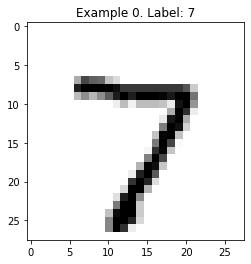

In [49]:
display(0)

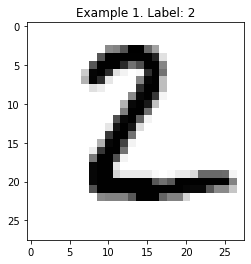

In [10]:
display(1)

#### No feature engineering
1. We'll use the raw pixels
2. Classifier does the rest

### Initialize the classifier
Burada doğrusal bir sınıflandırıcı kullanacağız. İki parametre sağlayacağız.

In [58]:
feature_columns = [data,labels]

In [59]:
classifier=tf.estimator.LinearClassifier(n_classes=10,feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyi189z1v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [61]:
p = classifier.predict(test_data)

In [64]:
p

<generator object Estimator.predict at 0x7f38669b6200>